# Overfitting - regularization

### L2 and L1 regularization for linear estimators

### Michał Spinczyk

In [76]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [77]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=0.2, random_state=42)

print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Linear Regression

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

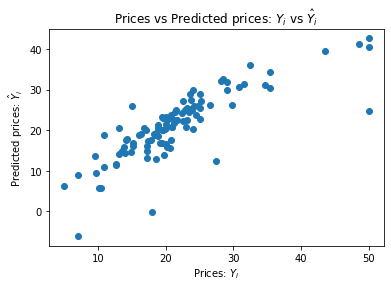

In [79]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

Y_pred = l_reg.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [80]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, Y_pred)
print('MSE =',error)

print('Train score:',l_reg.score(X_train, y_train))
print('Test score:',l_reg.score(X_test, y_test))

MSE = 24.291119474973616
Train score: 0.7508856358979672
Test score: 0.6687594935356307


In [81]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scaler = StandardScaler()
scaler.fit(bos)
normalized_data = scaler.transform(bos)
print(normalized_data)

polynomial_features= PolynomialFeatures(degree=2)
polynomial = polynomial_features.fit_transform(normalized_data)
print(polynomial)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]
[[ 1.         -0.41978194  0.28482986 ...  0.19452681 -0.47437883
   1.15683427]
 [ 1.         -0.41733926 -0.48772236 ...  0.19452681 -0.21719133
   0.24249653]
 [ 1.         -0.41734159 -0.48772236 ...  0.15715436 -0.47917217
   1.46102192]
 ...
 [ 1.         -0.41344658 -0.48772236 ...  0.19452681 -0.43357505
   0.9663826 ]
 [ 1.         -0.40776407 -0.48772236 ...  0.16259032 -0.34891116
   0.74874691]
 [ 1.         -0.41500016 -0.48772236 ...  0.19452681 -0.29508947
   0.44763905]]


MSE = 14.259416570242713
Train score: 0.9409306693576345
Test score: 0.8055546031347018


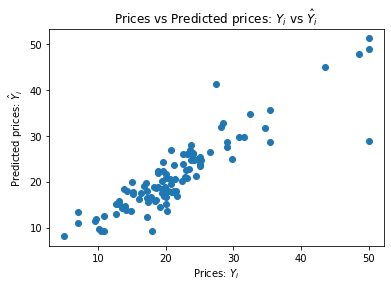

In [82]:
X_train, X_test, y_train, y_test = train_test_split(polynomial, boston.target, test_size=0.2, random_state=42)

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

Y_pred = l_reg.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

error = mean_squared_error(y_test, Y_pred)
print('MSE =',error)

print('Train score:',l_reg.score(X_train, y_train))
print('Test score:',l_reg.score(X_test, y_test))

## Lasso

MSE = 13.714944390879166
Train score: 0.9013106751957831
Test score: 0.8129791782200103


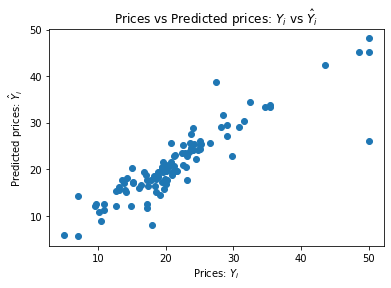

In [83]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Y_pred = lasso.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

error = mean_squared_error(y_test, Y_pred)
print('MSE =',error)

print('Train score:',lasso.score(X_train, y_train))
print('Test score:',lasso.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.497e+02, tolerance: 3.510e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.307e+02, tolerance: 3.510e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

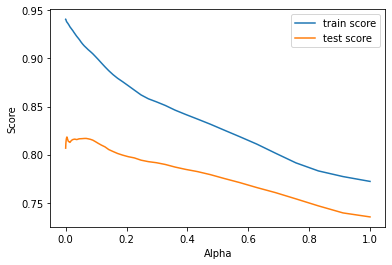

In [84]:
train = []
test = []
vec = np.linspace(-4, 0,100)
vec = 10**vec
for i in vec:
  lasso = Lasso(alpha = i,max_iter = 10000)
  lasso.fit(X_train, y_train)
  Y_pred = lasso.predict(X_test)
  train.append(lasso.score(X_train, y_train))
  test.append(lasso.score(X_test, y_test))

plt.figure()
plt.plot(vec,train, label = 'train score')
plt.plot(vec,test, label = 'test score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()
  

## Ridge

MSE = 13.912292572384654
Train score: 0.940359385072897
Test score: 0.8102880831612154


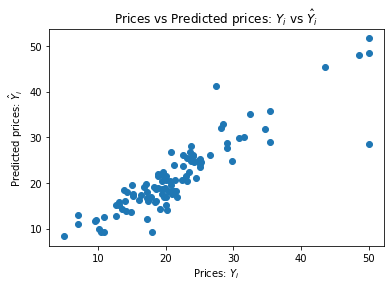

In [85]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Y_pred = ridge.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

error = mean_squared_error(y_test, Y_pred)
print('MSE =',error)

print('Train score:',ridge.score(X_train, y_train))
print('Test score:',ridge.score(X_test, y_test))

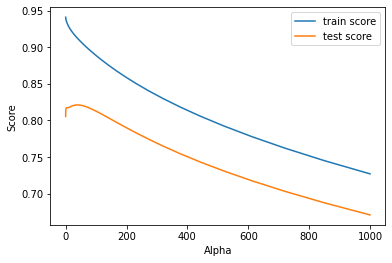

In [86]:
train = []
test = []
vec = np.linspace(-4, 3,100)
vec = 10**vec
for i in vec:
  ridge = Ridge(alpha = i,max_iter = 10000)
  ridge.fit(X_train, y_train)
  Y_pred = ridge.predict(X_test)
  train.append(ridge.score(X_train, y_train))
  test.append(ridge.score(X_test, y_test))

plt.figure()
plt.plot(vec,train, label = 'train score')
plt.plot(vec,test, label = 'test score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()
  

## Regularization for logistic regression

In [87]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

data_cancer = pd.DataFrame(data.data)
print(data)
print(data.feature_names)
print(data.data.shape)
print(data.data)
print(data.target.shape)
print(data_cancer.isnull().sum().sum())
data_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [88]:
from sklearn.linear_model import LogisticRegression

X = data_cancer
y = data.target

X = (X - X.mean()) / X.std() # normalization

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

regr = LogisticRegression(penalty = 'l1', max_iter=1000, solver='liblinear', C=1)
regr.fit(features_train,labels_train)

Y_pred = regr.predict(features_test)

error = mean_squared_error(labels_test, Y_pred)
print('MSE =',error)

print('Train score:',regr.score(features_train, labels_train))
print('Test score:',regr.score(features_test, labels_test))

MSE = 0.04678362573099415
Train score: 0.992462311557789
Test score: 0.9532163742690059


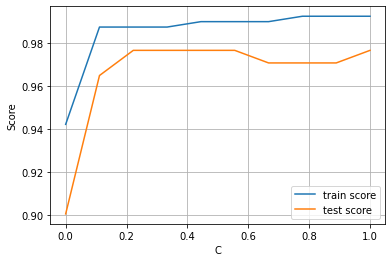

In [89]:
vec2 = np.linspace(0.0001, 1, 10)
train = []
test = []
for c in vec2:
    regr = LogisticRegression(penalty = 'l2', max_iter=1000, solver='liblinear', C=c)
    regr.fit(features_train,labels_train)
    train.append(regr.score(features_train, labels_train))
    test.append(regr.score(features_test, labels_test))

plt.figure()
plt.plot(vec2, train, label = 'train score')
plt.plot( vec2, test, label = 'test score')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

## Regularization for kNN method


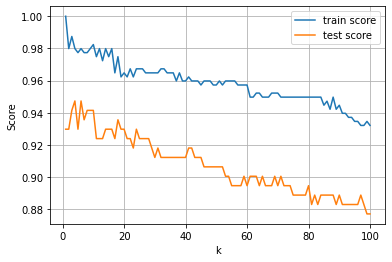

In [90]:
from sklearn.neighbors import KNeighborsClassifier
n = 100
vec3 = np.linspace(1, n, n)
train = []
test = []
for k in range(1,n+1):
    knn=KNeighborsClassifier(k)
    knn.fit(features_train, labels_train)
    train.append(knn.score(features_train, labels_train))
    test.append(knn.score(features_test, labels_test))

plt.figure()
plt.plot(vec3, train, label = 'train score')
plt.plot( vec3, test, label = 'test score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

The optimal value for k is 8.

## Decision trees optimization

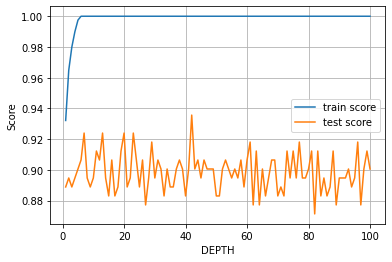

In [91]:
from sklearn import tree

n = 100
vec3 = np.linspace(1, n, n)
train = []
test = []
for n in range(1,n+1):
    DEPTH = n
    tree_n = tree.DecisionTreeClassifier(max_depth = DEPTH)
    tree_n.fit(features_train, labels_train)
    train.append(tree_n.score(features_train, labels_train))
    test.append(tree_n.score(features_test, labels_test))

plt.figure()
plt.plot(vec3, train, label = 'train score')
plt.plot( vec3, test, label = 'test score')
plt.xlabel('DEPTH')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

The optimal tree depth is 10.